In [6]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score,silhouette_samples
from scipy.stats import zscore 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,auc

In [0]:
car_df=pd.read_csv(
    '/content/drive/My Drive/AI_ML_CLass/Assignments/external/unsupervisedLearning/Project1/cars-dataset.csv')

In [4]:
car_df.shape

(398, 8)

In [5]:
# printing random values
randm=np.random.randint(0,399,5)
car_df.iloc[randm]

,car name,cyl,disp,hp,wt,acc,yr,mpg
127,amc hornet,6,232.0,100,2901,16.0,74,19.0
252,pontiac phoenix lj,6,231.0,105,3535,19.2,78,19.2
275,volvo 264gl,6,163.0,125,3140,13.6,78,17.0
6,chevrolet impala,8,454.0,220,4354,9.0,70,14.0
326,vw dasher (diesel),4,90.0,48,2335,23.7,80,43.4


In [0]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [0]:
# converting non numeric data of hp column to null value
car_df.hp=pd.to_numeric(car_df.hp,errors='coerce')

In [0]:
car_df.mpg=pd.to_numeric(car_df.mpg,errors='coerce')

In [44]:
car_df.mpg.isnull().value_counts()

False    392
Name: mpg, dtype: int64

In [0]:
car_df.hp.isnull().value_counts()

False    392
True       6
Name: hp, dtype: int64

In [0]:
car_df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


In [0]:
#Dropping row who having null value
car_df=car_df.drop(car_df[car_df.hp.isnull()==True].index)

In [0]:
car_df.shape

(392, 8)

In [0]:
car_df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


## Univariate Analysis

* We  can see no significant change in dataset after removing null value. 

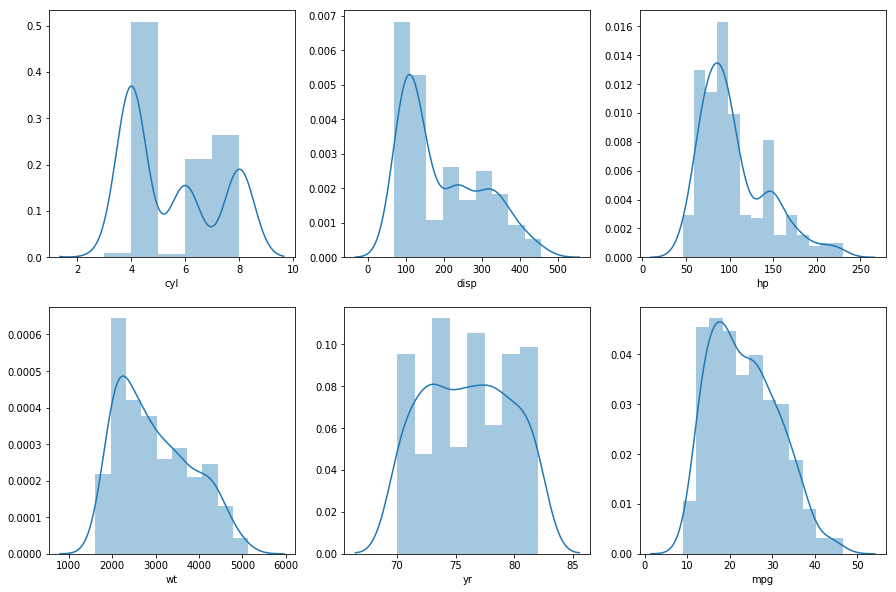

In [42]:
# first see distribution
plotCofig, axes = plt.subplots(nrows=2,ncols = 3, figsize=(15, 10))

#plt.title('Histogram of MDVP:Fo(Hz)')
#plt.xlabel('MDVP:Fo(Hz)')
#sns.distplot(car_df['car name'],ax=axes[0,0])
sns.distplot(car_df['cyl'],ax=axes[0,0])
sns.distplot(car_df['disp'],ax=axes[0,1])
sns.distplot(car_df['hp'],ax=axes[0,2])
sns.distplot(car_df['wt'],ax=axes[1,0])
sns.distplot(car_df['yr'],ax=axes[1,1])
sns.distplot(car_df['mpg'],ax=axes[1,2])

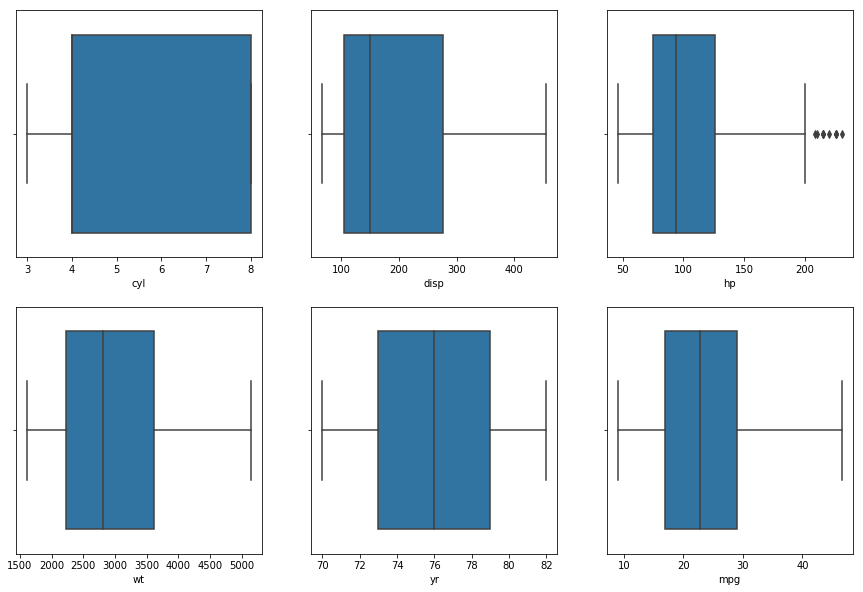

In [44]:
# boxplot analysis
plotCofig, axes = plt.subplots(nrows=2,ncols = 3, figsize=(15, 10))
sns.boxplot(car_df['cyl'],ax=axes[0,0])
sns.boxplot(car_df['disp'],ax=axes[0,1])
sns.boxplot(car_df['hp'],ax=axes[0,2])
sns.boxplot(car_df['wt'],ax=axes[1,0])
sns.boxplot(car_df['yr'],ax=axes[1,1])
sns.boxplot(car_df['mpg'],ax=axes[1,2])

### Univariate EDA
* There are 2 or 3 gaussians curv after looking histogram graph.
* Data-set is not distributed normally.Some have mutiple mutiple local maxima.
* Feature column Hp having many outliner datapoints at right side.
* Distribution of feture column mpg, dis are in right skewed.

# Bivariate 

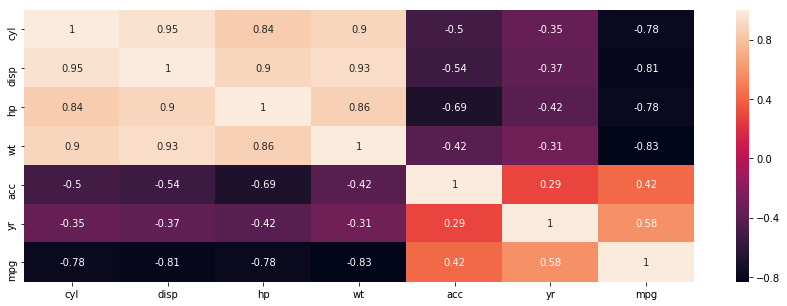

In [47]:
# First, looking correlation between features:
plt.figure(figsize=(15, 5))
sns.heatmap(car_df.corr(),annot=True)

### Heat map Observation
* By looking heat map, most of feture column are not independent.They are dependent to each other.
* Some having very high positive corrletion or negative correlation.
* feture column displacement is highly correlated with no of cylinder,horse power,weight and mpg.
* same thing happening between other column also. Like Mpg vs cyl,weight vs hp.

In [0]:
# Prepare car data set which does not have car name and year.
#(['cyl','disp','hp','wt','acc','yr','mpg'])
car_df_new=car_df.loc[:,['cyl','disp','hp','wt','acc','yr','mpg']]
# since euclidian distance will calculated,it is goog to do normailization using zscore
car_df_z=car_df_new.apply(zscore)
car_df_z2=car_df_new.apply(zscore)

In [0]:
# K-Mean Cluster
cluster_range = range( 2, 10)  
 # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(car_df_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(silhouette_score(car_df_z, labels, metric='euclidean'))

In [0]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , 
                             "Avg Sil Score": cluster_sil_scores } )

In [55]:
clusters_df.head(10)

,num_clusters,cluster_errors,Avg Sil Score
0,2,1272.900760,0.481209
1,3,928.617487,0.354494
2,4,725.327184,0.348754
3,5,656.367063,0.308923
4,6,587.822599,0.293003
5,7,533.955221,0.268451
6,8,488.025375,0.269790
7,9,446.579559,0.267346


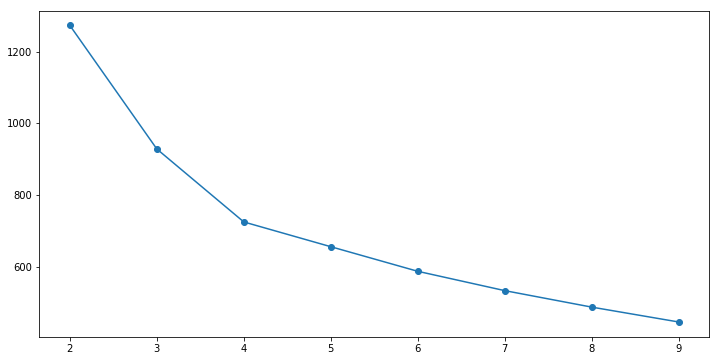

In [56]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [0]:
# The elbow plot shows that 4 or 3 might be a good choice for K and it 
#seems logical given we know there are 7 qualities of wine

In [57]:
cluster_mean = KMeans( n_clusters = 4, random_state = 1 )
cluster_mean.fit(car_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [0]:
centroids_mean = cluster_mean.cluster_centers_

In [0]:
mean_centroid_df = pd.DataFrame(centroids_mean, columns = list(car_df_z) )

In [60]:
mean_centroid_df

,cyl,disp,hp,wt,acc,yr,mpg
0,1.483947,1.489139,1.506794,1.391452,-1.075993,-0.682654,-1.156649
1,0.415493,0.300312,-0.035301,0.341416,0.306338,0.066628,-0.492659
2,-0.858144,-0.802475,-0.557447,-0.753095,0.320713,-0.630489,0.206680
3,-0.831702,-0.793205,-0.759195,-0.787826,0.383560,1.112738,1.210125


In [0]:
prediction_mean=cluster_mean.predict(car_df_z)
car_df_z["GROUP"] = prediction_mean

In [63]:
car_df_z.groupby("GROUP").count()

,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,
0,94,94,94,94,94,94,94
1,89,89,89,89,89,89,89
2,100,100,100,100,100,100,100
3,109,109,109,109,109,109,109


In [0]:
#heirachical clustering
# cophenet index is a measure of the correlation between the 
# distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
war_link = linkage(car_df_z, 'ward')
c, coph_dists = cophenet(war_link , pdist(car_df_z))

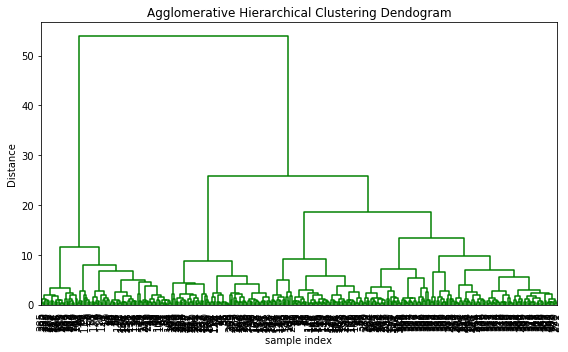

In [23]:
plt.figure(figsize=(8, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(war_link, leaf_rotation=90.,color_threshold=80,  leaf_font_size=10. )
plt.tight_layout()

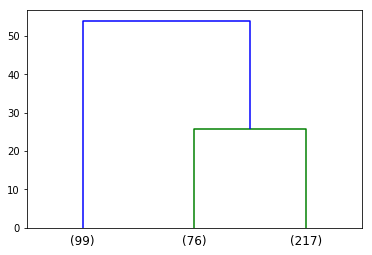

In [25]:
dendrogram(
    war_link,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [0]:
# looking denodo gram we find optimal cluster is 3

In [26]:
from sklearn.cluster import AgglomerativeClustering
h_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
h_cluster.fit(car_df_z2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [0]:
# append label to car_df 
car_df_z2['level']=h_cluster.labels_

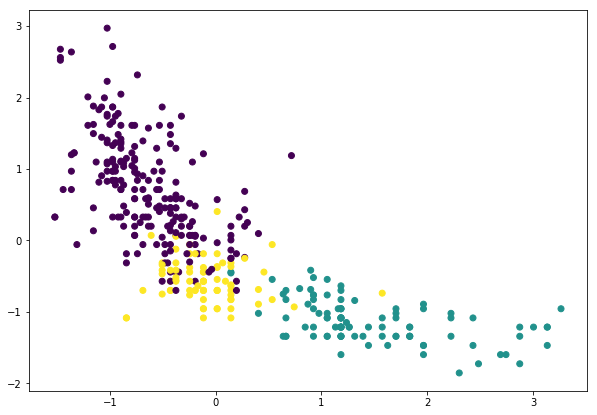

In [19]:
#lets visulize cluster on dataset
plt.figure(figsize=(10, 7))  
plt.scatter(car_df_z2['hp'], car_df_z2['mpg'], c=h_cluster.labels_) 

In [0]:
# seperating data-set on basis of cluster 
car_df_cluster1=car_df_z2[car_df_z2.level==0]
car_df_cluster2=car_df_z2[car_df_z2.level==1]
car_df_cluster3=car_df_z2[car_df_z2.level==2]

In [0]:
# apply leaner regression to each cluster to predict mpg
X_1 = car_df_cluster1.loc[:,['cyl','disp','hp','wt','acc','yr']]
Y_1 = car_df_cluster1.loc[:,['mpg']]
X_2 = car_df_cluster2.loc[:,['cyl','disp','hp','wt','acc','yr']]
Y_2 = car_df_cluster2.loc[:,['mpg']]
X_3 = car_df_cluster3.loc[:,['cyl','disp','hp','wt','acc','yr']]
Y_3 = car_df_cluster3.loc[:,['mpg']]

In [0]:
regression_model1 = LinearRegression()
regression_model2 = LinearRegression()
regression_model3 = LinearRegression()

In [50]:
regression_model1.fit(X_1,Y_1)
regression_model2.fit(X_2,Y_2)
regression_model3.fit(X_3,Y_3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
print('Slope-1:' ,regression_model1.coef_)
print('Slope-2:' ,regression_model2.coef_)
print('Slope-3:' ,regression_model3.coef_)

Slope-1: [[ 0.45792419 -0.36862662 -0.54592073 -0.58291171 -0.02134815  0.40474463]]
Slope-2: [[ 0.         -0.05872242 -0.0982939  -0.16421348 -0.15407129  0.19067494]]
Slope-3: [[ 0.53600768  0.04150554 -0.1337595  -0.35489813 -0.08577144  0.15205709]]
